# Mario + Reinforcement Learning

https://github.com/nicknochnack/MarioRL/blob/main/Mario%20Tutorial.ipynb

In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT


In [2]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
# setting up env

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [4]:
env.observation_space.shape

(240, 256, 3)

In [5]:
env.action_space

Discrete(7)

In [6]:
def func():
    # Create a flag - restart or not
    done = True
    # Loop through each frame in the game
    for step in range(100000): 
        # Start the game to begin with 
        if done: 
            # Start the gamee
            env.reset()
        # Do random actions
        state, reward, done, info = env.step(env.action_space.sample())
        # Show the game on the screen
        env.render()

    # Close the game
    env.close()

In [7]:
state = env.reset()

In [8]:
state.shape

(240, 256, 3)

In [9]:
len(env.step(1))

4

In [11]:
env.step(1)[3]

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

### preprocessing

- bad input creates a bad ai, you need to preprocess data that the ai can learn from
- mario will use grey scale and frame stacking
- grey scale allows a faster ai and faster learning
- framestacking giving the ai context / giving it more memory

In [34]:
# wrapper for gray scale and frame stacking
from gym.wrappers import GrayScaleObservation, FrameStack
# vectorized wrapper
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# matplotlib
from matplotlib import pyplot as plt

In [50]:
# setting up the base environment

env = gym_super_mario_bros.make('SuperMarioBros-v0')

# simplify the action space 

env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [51]:
# applying gray scale

env = GrayScaleObservation(env, keep_dim=True)

In [52]:
# wrapping inside the dummy vectorized environment

env = DummyVecEnv([lambda: env])

In [53]:
# stack the frames
env = VecFrameStack(env, 4, channels_order="last")

In [47]:
state.shape
# as you can see the number of colour channels is reduced to one

(240, 256, 3)

In [74]:
state = env.reset()

In [66]:
state.shape

(1, 240, 256, 4)

In [71]:
state, reward, done, info = env.step([env.action_space.sample()])

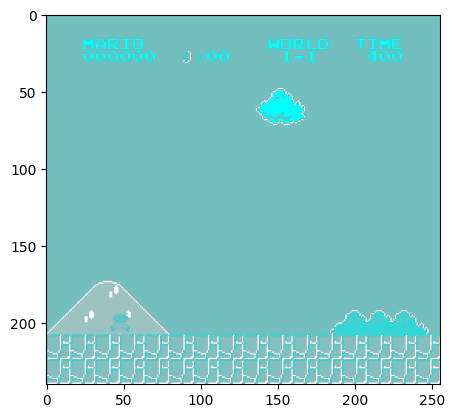

In [68]:
plt.imshow(state[0])

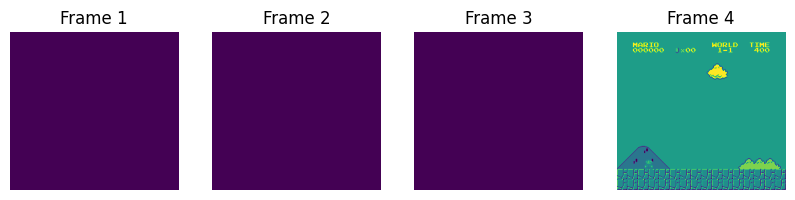

In [75]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0,:,:,idx])
    plt.axis('off')
    plt.title(f'Frame {idx+1}')
plt.show()

### building the model

- reinforcement learning needs vectors to learn
- stable_baselines is the library that does reinforcement learning
- the specific rl algorithm : proxy policy optimization

In [ ]:
    a

### running the model